In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [15]:
# download dataset
! wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

--2022-11-30 23:27:09--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: 'lfw.tgz'

     0K .......... .......... .......... .......... ..........  0%  286K 10m17s
    50K .......... .......... .......... .......... ..........  0%  251K 10m59s
   100K .......... .......... .......... .......... ..........  0%  299K 10m35s
   150K .......... .......... .......... .......... ..........  0%  328K 10m11s
   200K .......... .......... .......... .......... ..........  0%  366K 9m45s
   250K .......... .......... .......... .......... ..........  0%  418K 9m17s
   300K .......... .......... .......... .......... ..........  0%  441K 8m55s
   350K .......... .......... .......... .......... ..........  0%  441K 8m37s
   400K .......... ..

 49650K .......... .......... .......... .......... .......... 28% 14.9M 33s
 49700K .......... .......... .......... .......... .......... 28% 40.6M 33s
 49750K .......... .......... .......... .......... .......... 28% 12.8M 33s
 49800K .......... .......... .......... .......... .......... 28% 21.3M 33s
 49850K .......... .......... .......... .......... .......... 28% 14.8M 33s
 49900K .......... .......... .......... .......... .......... 28% 13.1M 33s
 49950K .......... .......... .......... .......... .......... 28% 17.0M 33s
 50000K .......... .......... .......... .......... .......... 28% 7.90M 33s
 50050K .......... .......... .......... .......... .......... 28% 47.0M 33s
 50100K .......... .......... .......... .......... .......... 28% 27.2M 33s
 50150K .......... .......... .......... .......... .......... 28% 9.32M 33s
 50200K .......... .......... .......... .......... .......... 28% 9.07M 33s
 50250K .......... .......... .......... .......... .......... 28% 8.68M 33s

In [16]:
# extract dataset
! tar -xvzf lfw.tgz

x lfw/
x lfw/George_HW_Bush/
x lfw/George_HW_Bush/George_HW_Bush_0001.jpg
x lfw/George_HW_Bush/George_HW_Bush_0002.jpg
x lfw/George_HW_Bush/George_HW_Bush_0003.jpg
x lfw/George_HW_Bush/George_HW_Bush_0004.jpg
x lfw/George_HW_Bush/George_HW_Bush_0005.jpg
x lfw/George_HW_Bush/George_HW_Bush_0006.jpg
x lfw/George_HW_Bush/George_HW_Bush_0007.jpg
x lfw/George_HW_Bush/George_HW_Bush_0008.jpg
x lfw/George_HW_Bush/George_HW_Bush_0009.jpg
x lfw/George_HW_Bush/George_HW_Bush_0010.jpg
x lfw/George_HW_Bush/George_HW_Bush_0011.jpg
x lfw/George_HW_Bush/George_HW_Bush_0012.jpg
x lfw/George_HW_Bush/George_HW_Bush_0013.jpg
x lfw/Curtis_Strange/
x lfw/Curtis_Strange/Curtis_Strange_0001.jpg
x lfw/Marc_Grossman/
x lfw/Marc_Grossman/Marc_Grossman_0001.jpg
x lfw/Marc_Grossman/Marc_Grossman_0002.jpg
x lfw/Marc_Grossman/Marc_Grossman_0003.jpg
x lfw/Marc_Grossman/Marc_Grossman_0004.jpg
x lfw/Michael_Schumacher/
x lfw/Michael_Schumacher/Michael_Schumacher_0001.jpg
x lfw/Michael_Schumacher/Michael_Schumacher_000

In [17]:
#capture paths to images
face_images = glob.glob('lfw/**/*.jpg')


x lfw/Ciro_Gomes/
x lfw/Ciro_Gomes/Ciro_Gomes_0001.jpg
x lfw/Ciro_Gomes/Ciro_Gomes_0002.jpg
x lfw/Ciro_Gomes/Ciro_Gomes_0003.jpg
x lfw/Ciro_Gomes/Ciro_Gomes_0004.jpg
x lfw/Ciro_Gomes/Ciro_Gomes_0005.jpg
x lfw/Sergio_Garcia/
x lfw/Sergio_Garcia/Sergio_Garcia_0001.jpg
x lfw/Sergio_Garcia/Sergio_Garcia_0002.jpg
x lfw/Diego_Armando_Maradona/
x lfw/Diego_Armando_Maradona/Diego_Armando_Maradona_0001.jpg
x lfw/Hassan_Nasrallah/
x lfw/Hassan_Nasrallah/Hassan_Nasrallah_0001.jpg
x lfw/Hassan_Nasrallah/Hassan_Nasrallah_0002.jpg
x lfw/Fernando_Vargas/
x lfw/Fernando_Vargas/Fernando_Vargas_0001.jpg
x lfw/Fernando_Vargas/Fernando_Vargas_0002.jpg
x lfw/Fernando_Vargas/Fernando_Vargas_0003.jpg
x lfw/Fernando_Vargas/Fernando_Vargas_0004.jpg
x lfw/Scott_Rolen/
x lfw/Scott_Rolen/Scott_Rolen_0001.jpg
x lfw/Gisele_Bundchen/
x lfw/Gisele_Bundchen/Gisele_Bundchen_0001.jpg
x lfw/Gisele_Bundchen/Gisele_Bundchen_0002.jpg
x lfw/Xanana_Gusmao/
x lfw/Xanana_Gusmao/Xanana_Gusmao_0001.jpg
x lfw/Xanana_Gusmao/Xanana

x lfw/Justin_Leonard/Justin_Leonard_0004.jpg
x lfw/Tatiana_Gratcheva/
x lfw/Tatiana_Gratcheva/Tatiana_Gratcheva_0001.jpg
x lfw/Garry_Kasparov/
x lfw/Garry_Kasparov/Garry_Kasparov_0001.jpg
x lfw/Garry_Kasparov/Garry_Kasparov_0002.jpg
x lfw/Andrei_Konchalovsky/
x lfw/Andrei_Konchalovsky/Andrei_Konchalovsky_0001.jpg
x lfw/Juljia_Vysotskij/
x lfw/Juljia_Vysotskij/Juljia_Vysotskij_0001.jpg
x lfw/Condoleezza_Rice/
x lfw/Condoleezza_Rice/Condoleezza_Rice_0001.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0002.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0003.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0004.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0005.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0006.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0007.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0008.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0009.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0010.jpg
x lfw/Condoleezza_Rice/Condoleezza_Rice_0011.jpg
x lfw/William_Shatner/
x lfw/William_Shatner/Will

x lfw/Trent_Lott/Trent_Lott_0002.jpg
x lfw/Trent_Lott/Trent_Lott_0003.jpg
x lfw/Trent_Lott/Trent_Lott_0004.jpg
x lfw/Trent_Lott/Trent_Lott_0005.jpg
x lfw/Trent_Lott/Trent_Lott_0006.jpg
x lfw/Trent_Lott/Trent_Lott_0007.jpg
x lfw/Trent_Lott/Trent_Lott_0008.jpg
x lfw/Trent_Lott/Trent_Lott_0009.jpg
x lfw/Trent_Lott/Trent_Lott_0010.jpg
x lfw/Trent_Lott/Trent_Lott_0011.jpg
x lfw/Trent_Lott/Trent_Lott_0012.jpg
x lfw/Trent_Lott/Trent_Lott_0013.jpg
x lfw/Trent_Lott/Trent_Lott_0014.jpg
x lfw/Trent_Lott/Trent_Lott_0015.jpg
x lfw/Trent_Lott/Trent_Lott_0016.jpg
x lfw/Kathie_Louise_Saunders/
x lfw/Kathie_Louise_Saunders/Kathie_Louise_Saunders_0001.jpg
x lfw/Stefano_Accorsi/
x lfw/Stefano_Accorsi/Stefano_Accorsi_0001.jpg
x lfw/Stefano_Accorsi/Stefano_Accorsi_0002.jpg
x lfw/Intisar_Ajouri/
x lfw/Intisar_Ajouri/Intisar_Ajouri_0001.jpg
x lfw/Intisar_Ajouri/Intisar_Ajouri_0002.jpg
x lfw/Intisar_Ajouri/Intisar_Ajouri_0003.jpg
x lfw/Raquel_Welch/
x lfw/Raquel_Welch/Raquel_Welch_0001.jpg
x lfw/Raquel_Welch/

x lfw/Tim_Henman/Tim_Henman_0001.jpg
x lfw/Tim_Henman/Tim_Henman_0002.jpg
x lfw/Tim_Henman/Tim_Henman_0003.jpg
x lfw/Tim_Henman/Tim_Henman_0004.jpg
x lfw/Tim_Henman/Tim_Henman_0005.jpg
x lfw/Tim_Henman/Tim_Henman_0006.jpg
x lfw/Tim_Henman/Tim_Henman_0007.jpg
x lfw/Tim_Henman/Tim_Henman_0008.jpg
x lfw/Tim_Henman/Tim_Henman_0009.jpg
x lfw/Tim_Henman/Tim_Henman_0010.jpg
x lfw/Tim_Henman/Tim_Henman_0011.jpg
x lfw/Tim_Henman/Tim_Henman_0012.jpg
x lfw/Tim_Henman/Tim_Henman_0013.jpg
x lfw/Tim_Henman/Tim_Henman_0014.jpg
x lfw/Tim_Henman/Tim_Henman_0015.jpg
x lfw/Tim_Henman/Tim_Henman_0016.jpg
x lfw/Tim_Henman/Tim_Henman_0017.jpg
x lfw/Tim_Henman/Tim_Henman_0018.jpg
x lfw/Tim_Henman/Tim_Henman_0019.jpg
x lfw/Kate_Starbird/
x lfw/Kate_Starbird/Kate_Starbird_0001.jpg
x lfw/Chris_Cirino/
x lfw/Chris_Cirino/Chris_Cirino_0001.jpg
x lfw/Gregor_Gysi/
x lfw/Gregor_Gysi/Gregor_Gysi_0001.jpg
x lfw/Robert_Lange/
x lfw/Robert_Lange/Robert_Lange_0001.jpg
x lfw/Chang_Sang/
x lfw/Chang_Sang/Chang_Sang_0001.jp

x lfw/Craig_Doblin/
x lfw/Craig_Doblin/Craig_Doblin_0001.jpg
x lfw/Arnie_Boehm/
x lfw/Arnie_Boehm/Arnie_Boehm_0001.jpg
x lfw/Roberta_Combs/
x lfw/Roberta_Combs/Roberta_Combs_0001.jpg
x lfw/Sara_Elisabeth_Ahmad/
x lfw/Sara_Elisabeth_Ahmad/Sara_Elisabeth_Ahmad_0001.jpg
x lfw/Jimmy_Carter/
x lfw/Jimmy_Carter/Jimmy_Carter_0001.jpg
x lfw/Jimmy_Carter/Jimmy_Carter_0002.jpg
x lfw/Jimmy_Carter/Jimmy_Carter_0003.jpg
x lfw/Jimmy_Carter/Jimmy_Carter_0004.jpg
x lfw/Jimmy_Carter/Jimmy_Carter_0005.jpg
x lfw/Jimmy_Carter/Jimmy_Carter_0006.jpg
x lfw/Jimmy_Carter/Jimmy_Carter_0007.jpg
x lfw/Jimmy_Carter/Jimmy_Carter_0008.jpg
x lfw/Jimmy_Carter/Jimmy_Carter_0009.jpg
x lfw/Carlos_Ortega/
x lfw/Carlos_Ortega/Carlos_Ortega_0001.jpg
x lfw/Carlos_Ortega/Carlos_Ortega_0002.jpg
x lfw/Carlos_Ortega/Carlos_Ortega_0003.jpg
x lfw/Paula_Radcliffe/
x lfw/Paula_Radcliffe/Paula_Radcliffe_0001.jpg
x lfw/Paula_Radcliffe/Paula_Radcliffe_0002.jpg
x lfw/Paula_Radcliffe/Paula_Radcliffe_0003.jpg
x lfw/Paula_Radcliffe/Paula_R

x lfw/Reggie_Miller/Reggie_Miller_0002.jpg
x lfw/Chen_Liang_Yu/
x lfw/Chen_Liang_Yu/Chen_Liang_Yu_0001.jpg
x lfw/Chen_Liang_Yu/Chen_Liang_Yu_0002.jpg
x lfw/Thad_Matta/
x lfw/Thad_Matta/Thad_Matta_0001.jpg
x lfw/Michael_J_Fox/
x lfw/Michael_J_Fox/Michael_J_Fox_0001.jpg
x lfw/Daniel_Radcliffe/
x lfw/Daniel_Radcliffe/Daniel_Radcliffe_0001.jpg
x lfw/Daniel_Radcliffe/Daniel_Radcliffe_0002.jpg
x lfw/Daniel_Radcliffe/Daniel_Radcliffe_0003.jpg
x lfw/Daniel_Radcliffe/Daniel_Radcliffe_0004.jpg
x lfw/Jon_Voight/
x lfw/Jon_Voight/Jon_Voight_0001.jpg
x lfw/Jon_Voight/Jon_Voight_0002.jpg
x lfw/Jon_Voight/Jon_Voight_0003.jpg
x lfw/Benjamin_Bratt/
x lfw/Benjamin_Bratt/Benjamin_Bratt_0001.jpg
x lfw/Talisa_Bratt/
x lfw/Talisa_Bratt/Talisa_Bratt_0001.jpg
x lfw/Ali_Abdullah_Saleh/
x lfw/Ali_Abdullah_Saleh/Ali_Abdullah_Saleh_0001.jpg
x lfw/Jan_Petersen/
x lfw/Jan_Petersen/Jan_Petersen_0001.jpg
x lfw/Darrell_Dickey/
x lfw/Darrell_Dickey/Darrell_Dickey_0001.jpg
x lfw/Harry_Belafonte/
x lfw/Harry_Belafonte/Ha

x lfw/Dyana_Calub/Dyana_Calub_0001.jpg
x lfw/Tomomi_Morita/
x lfw/Tomomi_Morita/Tomomi_Morita_0001.jpg
x lfw/Natasha_Lyonne/
x lfw/Natasha_Lyonne/Natasha_Lyonne_0001.jpg
x lfw/Masamori_Tokuyama/
x lfw/Masamori_Tokuyama/Masamori_Tokuyama_0001.jpg
x lfw/Jim_Otto/
x lfw/Jim_Otto/Jim_Otto_0001.jpg
x lfw/Jason_Lezak/
x lfw/Jason_Lezak/Jason_Lezak_0001.jpg
x lfw/Jason_Lezak/Jason_Lezak_0002.jpg
x lfw/Brett_Hawke/
x lfw/Brett_Hawke/Brett_Hawke_0001.jpg
x lfw/Anthony_Ervin/
x lfw/Anthony_Ervin/Anthony_Ervin_0001.jpg
x lfw/Freddy_Vasques_Kinchokpe/
x lfw/Freddy_Vasques_Kinchokpe/Freddy_Vasques_Kinchokpe_0001.jpg
x lfw/Jeffrey_Pfeffer/
x lfw/Jeffrey_Pfeffer/Jeffrey_Pfeffer_0001.jpg
x lfw/Paul_Celluci/
x lfw/Paul_Celluci/Paul_Celluci_0001.jpg
x lfw/Madonna/
x lfw/Madonna/Madonna_0001.jpg
x lfw/Madonna/Madonna_0002.jpg
x lfw/Madonna/Madonna_0003.jpg
x lfw/Madonna/Madonna_0004.jpg
x lfw/Madonna/Madonna_0005.jpg
x lfw/Guy_Ritchie/
x lfw/Guy_Ritchie/Guy_Ritchie_0001.jpg
x lfw/Guy_Ritchie/Guy_Ritchie_

x lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
x lfw/Paul_LeClerc/
x lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
x lfw/Eddie_Jordan/
x lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
x lfw/Lionel_Richie/
x lfw/Lionel_Richie/Lionel_Richie_0001.jpg
x lfw/Lionel_Richie/Lionel_Richie_0002.jpg
x lfw/Jose_Viegas_Filho/
x lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
x lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
x lfw/Roger_Mahony/
x lfw/Roger_Mahony/Roger_Mahony_0001.jpg
x lfw/Clay_Aiken/
x lfw/Clay_Aiken/Clay_Aiken_0001.jpg
x lfw/Clay_Aiken/Clay_Aiken_0002.jpg
x lfw/Clay_Aiken/Clay_Aiken_0003.jpg
x lfw/Clay_Aiken/Clay_Aiken_0004.jpg
x lfw/Clay_Aiken/Clay_Aiken_0005.jpg
x lfw/Clay_Aiken/Clay_Aiken_0006.jpg
x lfw/Edward_Egan/
x lfw/Edward_Egan/Edward_Egan_0001.jpg
x lfw/Pat_DAmuro/
x lfw/Pat_DAmuro/Pat_DAmuro_0001.jpg
x lfw/Demi_Moore/
x lfw/Demi_Moore/Demi_Moore_0001.jpg
x lfw/Demi_Moore/Demi_Moore_0002.jpg
x lfw/Demi_Moore/Demi_Moore_0003.jpg
x lfw/Demi_Moore/Demi_Moore_0004.jpg
x lfw/Jamie_K

x lfw/Dennis_Archer/Dennis_Archer_0001.jpg
x lfw/Cheryl_Little/
x lfw/Cheryl_Little/Cheryl_Little_0001.jpg
x lfw/Leticia_Van_de_Putte/
x lfw/Leticia_Van_de_Putte/Leticia_Van_de_Putte_0001.jpg
x lfw/Mitchell_Potter/
x lfw/Mitchell_Potter/Mitchell_Potter_0001.jpg
x lfw/Nelson_Acosta/
x lfw/Nelson_Acosta/Nelson_Acosta_0001.jpg
x lfw/Blythe_Hartley/
x lfw/Blythe_Hartley/Blythe_Hartley_0001.jpg
x lfw/Blythe_Hartley/Blythe_Hartley_0002.jpg
x lfw/Francesco_Totti/
x lfw/Francesco_Totti/Francesco_Totti_0001.jpg
x lfw/Anne_Heche/
x lfw/Anne_Heche/Anne_Heche_0001.jpg
x lfw/Kevin_Tarrant/
x lfw/Kevin_Tarrant/Kevin_Tarrant_0001.jpg
x lfw/Severino_Antinori/
x lfw/Severino_Antinori/Severino_Antinori_0001.jpg
x lfw/Kevin_Crane/
x lfw/Kevin_Crane/Kevin_Crane_0001.jpg
x lfw/Andre_Bucher/
x lfw/Andre_Bucher/Andre_Bucher_0001.jpg
x lfw/Stephen_Funk/
x lfw/Stephen_Funk/Stephen_Funk_0001.jpg
x lfw/Jamie_Olis/
x lfw/Jamie_Olis/Jamie_Olis_0001.jpg
x lfw/Janet_Crawford/
x lfw/Janet_Crawford/Janet_Crawford_0001

x lfw/Francois_Ozon/Francois_Ozon_0001.jpg
x lfw/Danis_Tanovic/
x lfw/Danis_Tanovic/Danis_Tanovic_0001.jpg
x lfw/Ben_Chandler/
x lfw/Ben_Chandler/Ben_Chandler_0001.jpg
x lfw/Jack_Knowlton/
x lfw/Jack_Knowlton/Jack_Knowlton_0001.jpg
x lfw/Vanessa_Incontrada/
x lfw/Vanessa_Incontrada/Vanessa_Incontrada_0001.jpg
x lfw/Vanessa_Incontrada/Vanessa_Incontrada_0002.jpg
x lfw/Vanessa_Incontrada/Vanessa_Incontrada_0003.jpg
x lfw/Vanessa_Incontrada/Vanessa_Incontrada_0004.jpg
x lfw/Pupi_Avati/
x lfw/Pupi_Avati/Pupi_Avati_0001.jpg
x lfw/Pupi_Avati/Pupi_Avati_0002.jpg
x lfw/Pupi_Avati/Pupi_Avati_0003.jpg
x lfw/Pupi_Avati/Pupi_Avati_0004.jpg
x lfw/Gerard_Depardieu/
x lfw/Gerard_Depardieu/Gerard_Depardieu_0001.jpg
x lfw/Gerard_Depardieu/Gerard_Depardieu_0002.jpg
x lfw/Nino_DAngelo/
x lfw/Nino_DAngelo/Nino_DAngelo_0001.jpg
x lfw/Katrin_Susi/
x lfw/Katrin_Susi/Katrin_Susi_0001.jpg
x lfw/Neri_Marcore/
x lfw/Neri_Marcore/Neri_Marcore_0001.jpg
x lfw/Neri_Marcore/Neri_Marcore_0002.jpg
x lfw/Manfred_Stolpe/

In [26]:
import keras.utils as image
all_images = []

for i in tqdm(face_images):
  img = image.load_img(i, target_size=(80,80,3))
  img = image.img_to_array(img)
  img = img/255.
  all_images.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 13233/13233 [00:14<00:00, 936.78it/s]


In [27]:
all_images = np.array(all_images)

# split data into train and validation data
train_x, val_x = train_test_split(all_images, random_state=47, test_size=0.1)

In [28]:
# function to reduce image resolution while keeping the image size constant

def pixalate_image(image, scale_percent = 40):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
  # scale back to original size
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)

  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

  return low_res_image

In [29]:
# get low resolution images for the training set
train_x_px = []

for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)

train_x_px = np.array(train_x_px)


# get low resolution images for the validation set
val_x_px = []

for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)

val_x_px = np.array(val_x_px)

In [30]:
# get low resolution images for the training set
train_x_px = []

for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)

train_x_px = np.array(train_x_px)


# get low resolution images for the validation set
val_x_px = []

for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)

val_x_px = np.array(val_x_px)

In [31]:
Input_img = Input(shape=(80, 80, 3))  
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [32]:
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 80, 80, 256)       7168      
                                                                 
 conv2d_8 (Conv2D)           (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 64)        73792     
                                                                 
 conv2d_10 (Conv2D)          (None, 40, 40, 64)        36928     
                                                           

In [33]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_x_px, train_x,
            epochs=5,
            batch_size=256,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper])

Epoch 1/5
47/47 [==============================] - 1339s 28s/step - loss: 0.0816 - val_loss: 0.0141
Epoch 2/5
47/47 [==============================] - 1339s 28s/step - loss: 0.0091 - val_loss: 0.0057
Epoch 3/5
47/47 [==============================] - 1333s 28s/step - loss: 0.0049 - val_loss: 0.0045
Epoch 4/5
47/47 [==============================] - 1333s 28s/step - loss: 0.0040 - val_loss: 0.0038
Epoch 5/5
47/47 [==============================] - 1332s 28s/step - loss: 0.0035 - val_loss: 0.0036


42/42 [==============================] - 27s 650ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


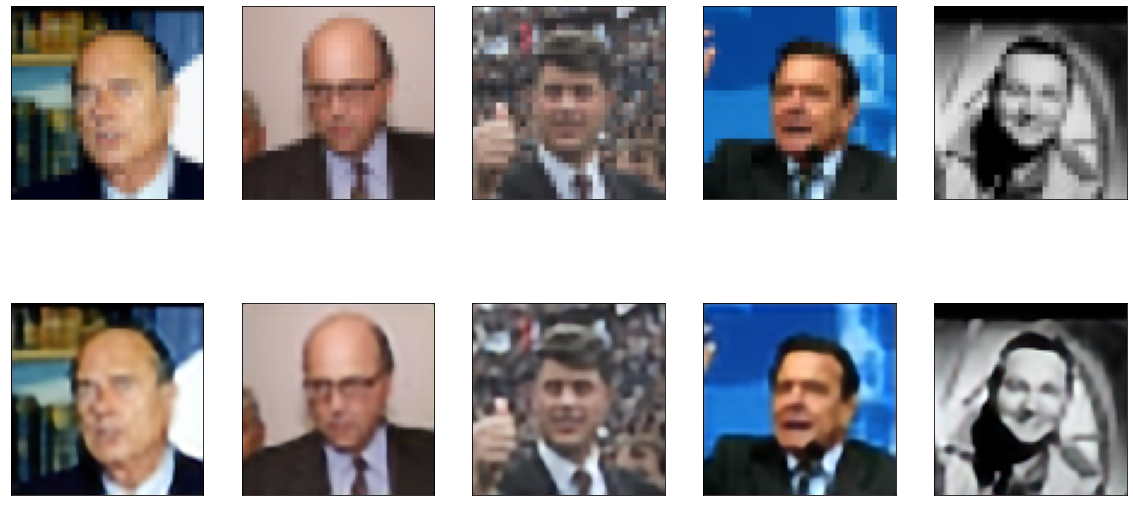

In [36]:
predictions = autoencoder.predict(val_x_px)

n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_x_px[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()